Implimentation of Lab-6-SVM.py

In [1]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

digits.target

dir(digits)

digits.target_names

df = pd.DataFrame(digits.data,digits.target)
df.head()

df['target'] = digits.target
df.head(20)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('target',axis='columns'), df.target, test_size=0.3)

"""Using RBF kernel"""

from sklearn.svm import SVC
rbf_model = SVC(kernel='rbf')

len(X_train)

len(X_test)

rbf_model.fit(X_train, y_train)

rbf_model.score(X_test,y_test)

"""Using Linear kernel"""

linear_model = SVC(kernel='linear')
linear_model.fit(X_train,y_train)

linear_model.score(X_test,y_test)

0.9740740740740741

1. Build a SVM classifier to classify IRIS flower dataset using the kernels RBF and linear.

Use 80% of data for training and 20% for testing.

Display accuracy score and confusion matrix of the trained model on test data.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

# Load IRIS dataset
iris_df = pd.read_csv('/content/iris (1).csv')
X_iris = iris_df.iloc[:, :-1]
y_iris = iris_df.iloc[:, -1]

# Split IRIS dataset
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# SVM with Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_iris, y_train_iris)
y_pred_linear = svm_linear.predict(X_test_iris)
print("SVM with linear kernel")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_linear))

# SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train_iris, y_train_iris)
y_pred_rbf = svm_rbf.predict(X_test_iris)
print("\nSVM with rbf kernel")
print("Accuracy:", accuracy_score(y_test_iris, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test_iris, y_pred_rbf))


SVM with linear kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

SVM with rbf kernel
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


2. Build a SVM classifier to classify Letter-recognition data set

Use 80% of data for training and 20% for testing.

Display accuracy score and confusion matrix of the trained model on test data. Plot the ROC curve
and display AUC score.




🔹 LETTER RECOGNITION - SVM with RBF Kernel
Accuracy: 0.9305
Confusion Matrix:
 [[144   0   1   0   0   0   1   0   0   0   1   0   1   0   0   0   0   0
    0   0   1   0   0   0   0   0]
 [  0 143   0   5   0   1   0   0   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [  0   0 123   0   2   0   3   1   0   0   1   0   0   0   4   0   0   2
    0   0   1   0   0   0   0   0]
 [  0   1   0 153   0   0   0   2   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   3   1   0 130   0   5   0   0   0   0   0   0   0   0   0   1   0
    0   0   0   0   0   0   0   1]
 [  0   2   0   0   1 134   0   0   1   0   0   0   0   0   0   0   0   0
    1   1   0   0   0   0   0   0]
 [  1   0   1   4   0   0 149   0   0   0   2   0   0   0   0   0   0   2
    0   0   0   1   0   0   0   0]
 [  0   4   0   8   0   0   0 106   0   0   5   0   0   1   2   1   1  13
    0   0   2   0   0   0   1   0]
 [  0   0   0   1   0   2   0   0 134   7   0   

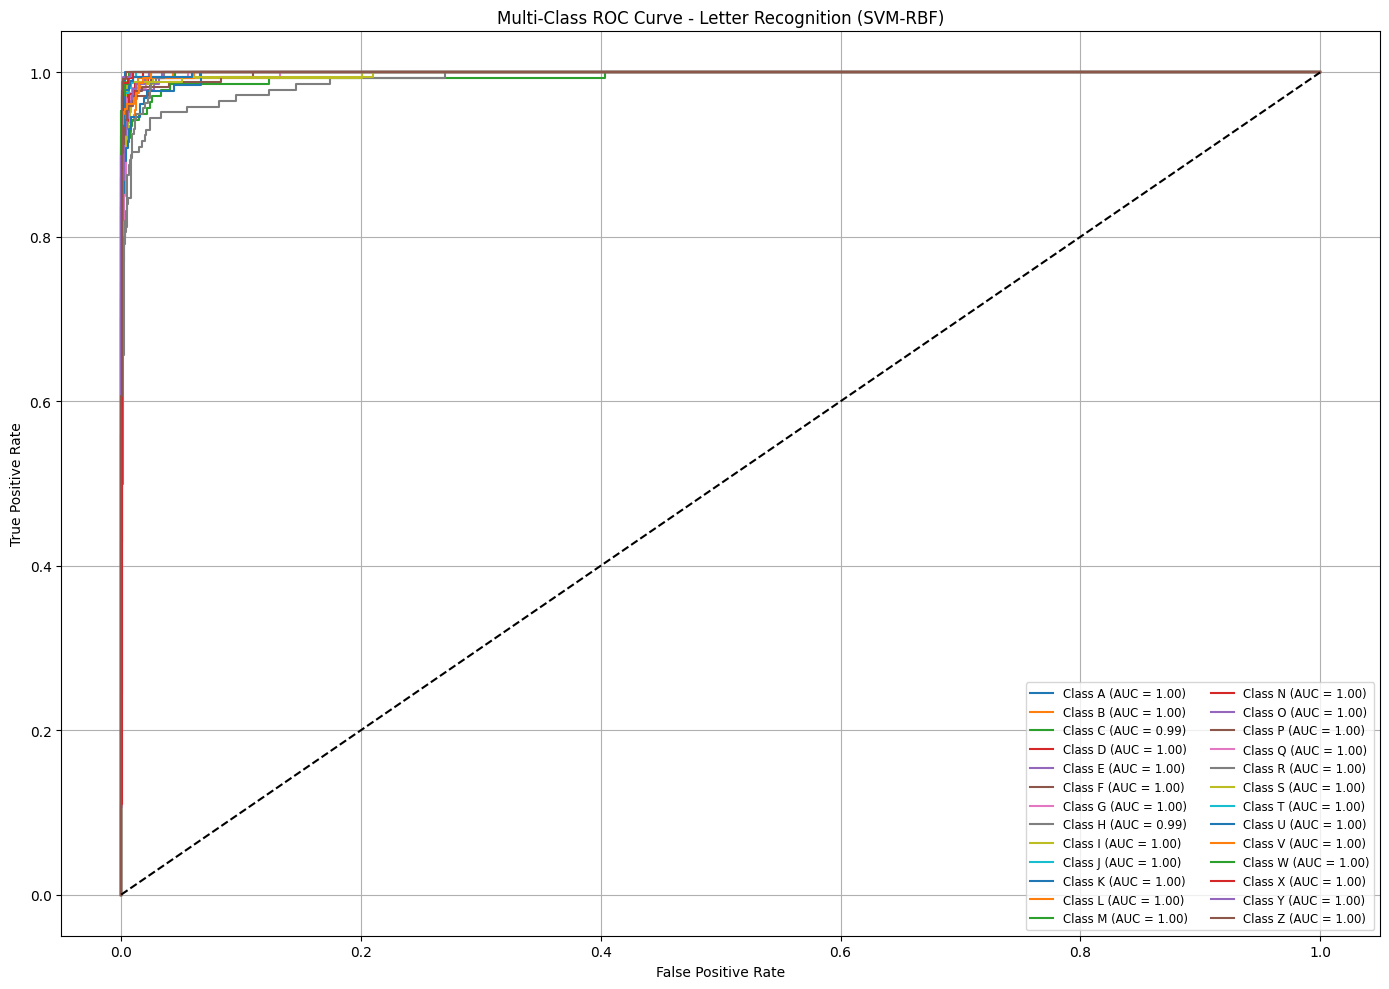

In [4]:

# Load and clean Letter dataset
letter_df = pd.read_csv('/content/letter-recognition.csv', header=0)
letter_df.columns = letter_df.columns.str.strip()  # Strip whitespace from column names

# Separate features and label
X_letter = letter_df.drop("letter", axis=1)
y_letter = letter_df["letter"]

# Train-test split
X_train_letter, X_test_letter, y_train_letter, y_test_letter = train_test_split(
    X_letter, y_letter, test_size=0.2, random_state=42
)

# Train SVM (RBF Kernel)
svm_letter = SVC(kernel='rbf', probability=True)
svm_letter.fit(X_train_letter, y_train_letter)
y_pred_letter = svm_letter.predict(X_test_letter)

# Evaluate
print("\n🔹 LETTER RECOGNITION - SVM with RBF Kernel")
print("Accuracy:", accuracy_score(y_test_letter, y_pred_letter))
print("Confusion Matrix:\n", confusion_matrix(y_test_letter, y_pred_letter))

# ROC Curve and AUC
lb = LabelBinarizer()
y_test_binarized = lb.fit_transform(y_test_letter)
y_score = svm_letter.predict_proba(X_test_letter)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(14, 10))
for i in range(len(lb.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multi-Class ROC Curve - Letter Recognition (SVM-RBF)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best', fontsize='small', ncol=2)
plt.grid()
plt.tight_layout()
plt.show()